In [3]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
import random
from sklearn.model_selection import train_test_split
import operator


In [4]:
def loadDataset(filename):
    data=pd.read_csv(filename)
    trainingSet, testSet = train_test_split(data, test_size = 0.25, random_state = 3)
    return trainingSet.values.tolist(), testSet.values.tolist()

In [5]:
def euclideanDistance(instance1, instance2): 
    distance=0
    for i in range(len(instance1)-1): #loop for each feature 
        distance+=pow((instance1[i]-instance2[i]),2)
    distance=math.sqrt(distance)
    return distance

In [6]:
## test for eucldieanDistance function
instance1=[4.6, 3.2, 1.4, 0.2, 'Setosa']
instance2=[6.4, 2.7, 5.3, 1.9, 'Virginica']
value=euclideanDistance(instance1, instance2)
print('Function value: ',value)
print('Correct answer: ',4.646504062195578)








Function value:  4.646504062195578
Correct answer:  4.646504062195578


In [15]:
def getNeighbors(trainingSet, testInstance, k):
    neighbors=[]
    distances=[]
    for i in range(len(trainingSet)):
        dist=euclideanDistance(testInstance, trainingSet[i])
        distances.append((trainingSet[i],dist)) #tuple
    distances.sort(key=operator.itemgetter(1))
    for i in range(k):
        neighbors.append(distances[i][0]) 
    return neighbors

In [10]:
## test for getNeighbors function

trainingSet, testSet=loadDataset('iris.csv')
testInstance=[4.6, 3.2, 1.4, 0.2, 'Setosa']
k=3
value=getNeighbors(trainingSet,testInstance,k)
print('Function value: ',value)
print('Correct answer: ',[[4.7, 3.2, 1.3, 0.2, 'Setosa'], [4.7, 3.2, 1.6, 0.2, 'Setosa'], [4.8, 3.0, 1.4, 0.3, 'Setosa']])



Function value:  [[4.7, 3.2, 1.3, 0.2, 'Setosa'], [4.7, 3.2, 1.6, 0.2, 'Setosa'], [4.8, 3.0, 1.4, 0.3, 'Setosa']]
Correct answer:  [[4.7, 3.2, 1.3, 0.2, 'Setosa'], [4.7, 3.2, 1.6, 0.2, 'Setosa'], [4.8, 3.0, 1.4, 0.3, 'Setosa']]


In [17]:
def getResponse(neighbors):
    classVotes = {} #dict
    for i in range(len(neighbors)):
        response = neighbors[i][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]
 

In [18]:
## test for getResponse function
neighbors=[[6.9, 3.1, 4.9, 1.5, 'Versicolor'], [6.5, 3.0, 5.2, 2.0, 'Virginica'], [6.5, 3.2, 5.1, 2.0, 'Virginica']]
value=getResponse(neighbors)
print('Function value:',value)
print('Correct answer: Virginica')



Function value: Virginica
Correct answer: Virginica


In [19]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [20]:
def main():
    trainingSet, testSet=loadDataset('iris.csv')
    print ('Train set: ',len(trainingSet))
    print ('Test set: ',len(testSet))
    # generate predictions
    predictions=[]
    k=3
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')
    
main()

Train set:  112
Test set:  38
> predicted='Setosa', actual='Setosa'
> predicted='Setosa', actual='Setosa'
> predicted='Setosa', actual='Setosa'
> predicted='Setosa', actual='Setosa'
> predicted='Setosa', actual='Setosa'
> predicted='Virginica', actual='Virginica'
> predicted='Versicolor', actual='Versicolor'
> predicted='Setosa', actual='Setosa'
> predicted='Virginica', actual='Virginica'
> predicted='Versicolor', actual='Versicolor'
> predicted='Versicolor', actual='Versicolor'
> predicted='Setosa', actual='Setosa'
> predicted='Versicolor', actual='Versicolor'
> predicted='Versicolor', actual='Versicolor'
> predicted='Virginica', actual='Virginica'
> predicted='Setosa', actual='Setosa'
> predicted='Virginica', actual='Versicolor'
> predicted='Virginica', actual='Virginica'
> predicted='Virginica', actual='Virginica'
> predicted='Setosa', actual='Setosa'
> predicted='Virginica', actual='Virginica'
> predicted='Virginica', actual='Virginica'
> predicted='Virginica', actual='Virginica'
>

For regression

In [21]:
import csv
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


def loadDataset(filename):
    df = pd.read_csv(filename, index_col=0)
    input_features=['Age','Income','Limit','Cards','Student','Education']
    target_feature=['Balance']
    df_input=df[input_features+target_feature]
    
    
###Categorical to dummy    
    df_input['Student'].replace('Yes',1,inplace=True)
    df_input['Student'].replace('No',0,inplace=True)
    
    
    train=df_input.sample(frac=0.75,random_state=3) #split into train and test
    test=df_input.drop(train.index)
    trainingSet=train.values.tolist()
    testSet=test.values.tolist()
    return trainingSet, testSet

def euclideanDistance(instance1, instance2): 
    distance=0
    for i in range(len(instance1)-1): #loop for each feature 
        distance+=pow((instance1[i]-instance2[i]),2)
    distance=math.sqrt(distance)
    return distance

import operator
def getNeighbors(trainingSet, testInstance, k):
    neighbors=[]
    distances=[]
    for i in range(len(trainingSet)):
        dist=euclideanDistance(testInstance, trainingSet[i])
        distances.append((trainingSet[i],dist)) 
    distances.sort(key=operator.itemgetter(1))
    for i in range(k):
        neighbors.append(distances[i][0]) 
    return neighbors

def getResponse(neighbors):
    values=np.array(neighbors)[:,-1]
    mean=np.average(values)
    return mean

def getAccuracy(testSet, predictions):
    accuracy=np.sqrt(np.average((np.array(testSet)[:,-1]-np.array(predictions))**2))
    print('test plot')
    plt.plot(np.array(testSet)[:,-1], np.array(predictions),  'ro', label='test set')
    plt.plot(np.array(testSet)[:,-1], np.array(testSet)[:,-1], label='standard line')
    plt.xlabel("Target")
    plt.ylabel("Output")
    plt.legend()
    plt.show()
    return accuracy


Train set: 300
Test set: 100
> predicted=275.3333333333333, actual=333.0
> predicted=743.6666666666666, actual=903.0
> predicted=764.3333333333334, actual=580.0
> predicted=764.3333333333334, actual=872.0
> predicted=1207.0, actual=1350.0
> predicted=138.33333333333334, actual=89.0
> predicted=237.33333333333334, actual=654.0
> predicted=1723.6666666666667, actual=1809.0
> predicted=0.0, actual=0.0
> predicted=924.3333333333334, actual=762.0
> predicted=891.3333333333334, actual=1120.0
> predicted=0.0, actual=0.0
> predicted=707.3333333333334, actual=902.0
> predicted=0.0, actual=0.0
> predicted=1207.0, actual=1084.0
> predicted=269.6666666666667, actual=532.0
> predicted=733.3333333333334, actual=812.0
> predicted=821.3333333333334, actual=937.0
> predicted=177.66666666666666, actual=155.0
> predicted=1314.3333333333333, actual=1311.0
> predicted=658.3333333333334, actual=745.0
> predicted=0.0, actual=0.0
> predicted=275.6666666666667, actual=47.0
> predicted=865.3333333333334, actual

/home/osilab1/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


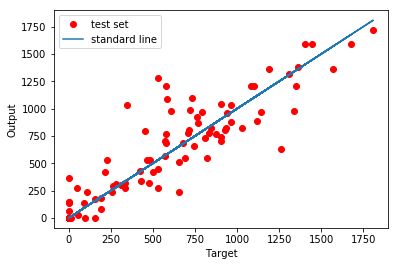

Accuracy(RMSE): 204.33012776169625


In [22]:
def main():
# prepare data
    trainingSet,testSet=loadDataset('Credit.csv')
    print ('Train set: ' + repr(len(trainingSet)))
    print ('Test set: ' + repr(len(testSet)))
    # generate predictions
    predictions=[]
    k=3
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy(RMSE): ' + repr(accuracy) )
    
main()

In [ ]:
##Standardization###    
#     scaler = StandardScaler()
#     scaler.fit(df_input[input_features])
#     df_input[input_features]=scaler.transform(df_input[input_features])
#     print(df_input)